Séries Temporais - ARIMA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
## pip install pmdarima
from pmdarima.arima import auto_arima

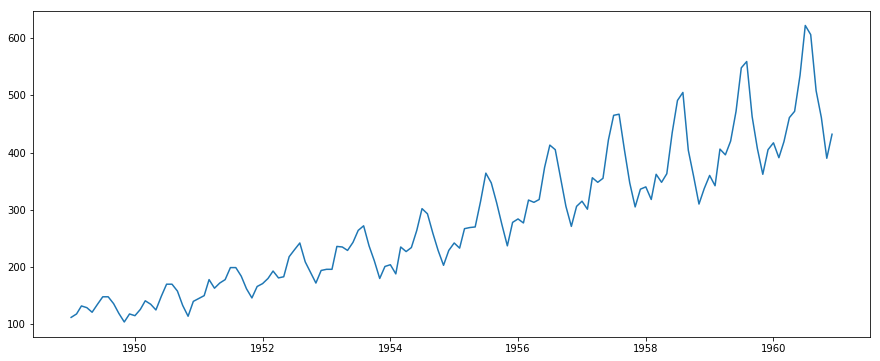

In [4]:
#carregando dados, convertendo string para data e criando série temporal
dados = pd.read_csv('AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
dados = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)
ts = dados['#Passengers']
plt.plot(ts)

In [6]:
#selecionando o melhor modelo pelo método auto_arima
#p = parâmetros autorregressivos, d = diferenças, q = parâmetros de médias móveis
stepwise_model = auto_arima(dados, start_p=1, start_q=1, start_d=0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.57 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=1.22 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=6.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=1.13 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=2.18 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=4.66 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=2.16 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=41.53 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=26.34 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=1.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=2.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=4.48 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=1.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=4.51 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=17.78 sec
 A

In [7]:
#verificando o melhor modelo a partir do AIC
#o AIC avalia o quanto o modelo é bom (quanto menor melhor)
print(stepwise_model.aic())

1012.9907964832406


In [9]:
#testando o modelo
treino = dados.loc['1949-01-01':'1959-12-01'] #o modelo será treinado com esse conjunto de dados
teste = dados.loc['1960-01-01':] #tentaremos prever esses valores, com base no treino

stepwise_model.fit(treino)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [11]:
#prevendo um período de 12 meses
future_forecast = stepwise_model.predict(n_periods=12)
future_forecast

1960-01-01    420.190242
1960-02-01    398.412388
1960-03-01    461.830696
1960-04-01    450.615626
1960-05-01    473.904749
1960-06-01    537.835737
1960-07-01    612.105155
1960-08-01    623.447308
1960-09-01    520.066095
1960-10-01    462.229872
1960-11-01    412.848682
1960-12-01    453.646015
Freq: MS, dtype: float64

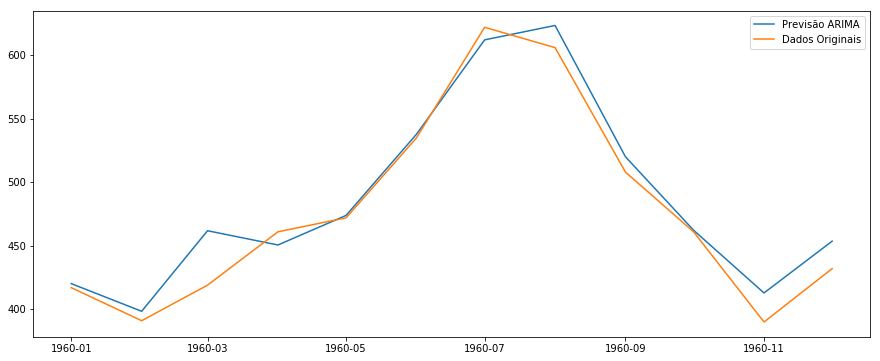

In [19]:
#criando dataframe e comparando os dados de 1960
future_forecast = pd.DataFrame(future_forecast,index = teste.index,columns=["#Passengers"])

#comparando os dados com a previsão do modelo
plt.plot(future_forecast, label = 'Previsão ARIMA')
plt.plot(teste, label = 'Dados Originais')
plt.legend()

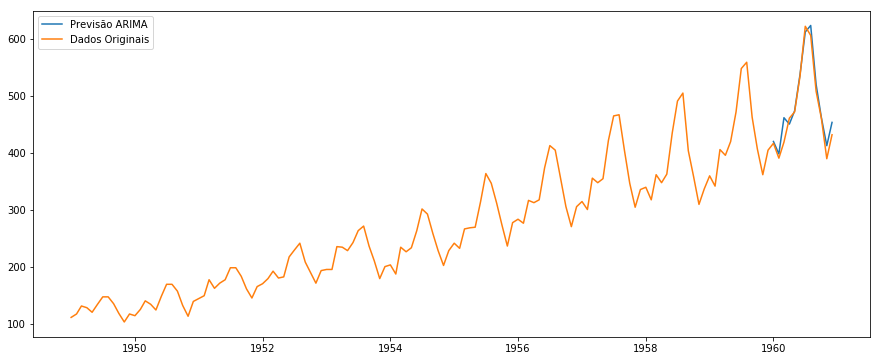

In [20]:
#comparando os dados com a previsão do modelo
plt.plot(future_forecast, label = 'Previsão ARIMA')
plt.plot(dados, label = 'Dados Originais')
plt.legend()